# Домашнее задание по статистическому анализу на python

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [197]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [198]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [199]:
freedom = df['Freedom']

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kostya/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


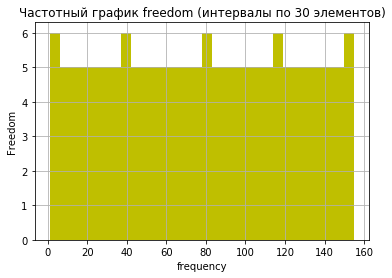

In [200]:
# частотный график Freedom. Равномерное распределение
n, bins, patches = plt.hist(df['Freedom'],30, facecolor='y')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график freedom (интервалы по 30 элементов)')
plt.grid(True)
plt.show()

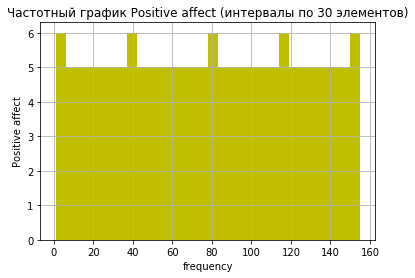

In [201]:
# частотный график Positive affect. Равномерное распределение
n, bins, patches = plt.hist(df['Positive affect'],30, facecolor='y')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (интервалы по 30 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [202]:
#выбросы и размах
print('число выбросов равно ', freedom.isnull().sum())
print('размах выборки равен', max(freedom) - min(freedom))

число выбросов равно  1
размах выборки равен 154.0


In [203]:
#убираем выброс
df_net = df[ df['Freedom'].isnull() == False ]
freedom = df_net['Freedom']

In [204]:
#математическое ожидание
statistics.mean(freedom)

78.0

In [205]:
#проверяем
freedom.sum() / freedom.count()

78.0

In [206]:
#медиана
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [207]:
#проблема нахождения моды
#стандартный инструмент возвращает ошибку
# print('Значение моды: ', statistics.mode(freedom))
#из-за того, что нет повторяющихся значений. Проверим:
freedom_u = pd.unique(freedom)
print('число элементов выборки равно', (len(freedom)), ', число уникальных элементов равно', len(freedom_u))

#похоже на то, что значения колонок - ранжирование стран. Моды нет, считать модальный интервал в целом бессмысленно

число элементов выборки равно 155 , число уникальных элементов равно 155


In [208]:
#минимум и максимум, отклонение и дисперсия
print('минимум:', min(freedom), ', максимум:', max(freedom_u))
print('стандартное отклонение ~', round(statistics.pstdev(freedom), 1))
print('дисперсия ~', statistics.pvariance(freedom))

минимум: 1.0 , максимум: 155.0
стандартное отклонение ~ 44.7
дисперсия ~ 2002.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

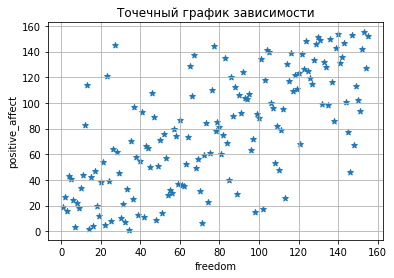

In [209]:
#корреляция графически
positive_affect = df_net['Positive affect']
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='*')

#судя по графику - есть прямая зависимость, довольно сильная. Рискну предположить, что R будет равен ~ 0.7

In [210]:
#посчитаем по формуле
from scipy.stats import pearsonr
correlation, p_value = pearsonr(freedom, positive_affect)
print(correlation)

#почти угадал! Положительная зависимость

0.6817698430601657


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [211]:
#нормализуем выборку
freedom_norm = freedom - statistics.mean(freedom)
freedom_norm.mean()

0.0

In [212]:
#масштабируем
from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm = minmax_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_norm))
print(max(freedom_norm))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

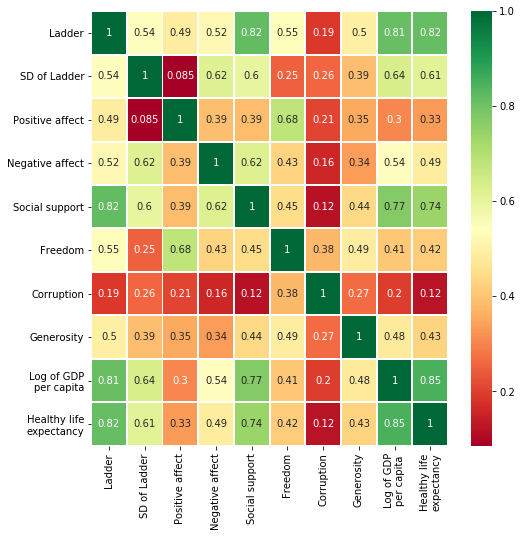

In [213]:
import seaborn as sns
sns.heatmap(df_net.corr(),annot=True,cmap='RdYlGn',linewidths=1.0)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Загрузить следующую таблицу: 

In [214]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_1=pd.read_csv(url)
df_1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

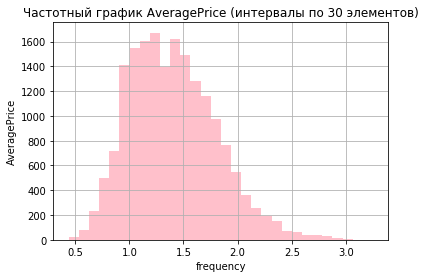

In [227]:
# частотный график AveragePrice. Распределение схожее с нормлаьным, но с отклонениями
dataframe, bins, patches = plt.hist(df_1['AveragePrice'],30, facecolor='pink')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (интервалы по 30 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [233]:
from scipy.stats import pearsonr
corr_avocado, p_value = pearsonr(df_1['AveragePrice'], df_1['4046'])
print(corr_avocado)

#Слабая отрицательная зависимость

-0.2083170484878848
